# Scikit learn cheat sheet

Cheat sheet to scikit learn. Includes

<ul style="list-style-type:circle">
  <li>Data pre-processing</li>
  <li>Different classifiers</li>
</ul>
 

Load at leas the first code cell in orde to have necessary data sets. Used data sets are
 - Iris data set
 
ver 0.01, in process... 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-sets-and-imports" data-toc-modified-id="Data-sets-and-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data sets and imports</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Plotter-for-decision-boundaries" data-toc-modified-id="Plotter-for-decision-boundaries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotter for decision boundaries</a></span></li><li><span><a href="#Visualize-iris-data-set" data-toc-modified-id="Visualize-iris-data-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualize iris data set</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn-bunch-object-into-pandas-data-frame" data-toc-modified-id="Scikit-learn-bunch-object-into-pandas-data-frame-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Scikit learn bunch object into pandas data frame</a></span></li><li><span><a href="#Splitting-data-into-train,-and-test-tests" data-toc-modified-id="Splitting-data-into-train,-and-test-tests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Splitting data into train, and test tests</a></span></li><li><span><a href="#MinMax-scaling" data-toc-modified-id="MinMax-scaling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>MinMax scaling</a></span></li></ul></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#K-nearest-neighbours" data-toc-modified-id="K-nearest-neighbours-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>K-nearest neighbours</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear regression</a></span></li></ul></li></ul></div>

## Data sets and imports

In [1]:
# Run this cell!!
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display_html
from IPython.display import display
%matplotlib notebook

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

iris = datasets.load_iris()

## Classification

### Plotter for decision boundaries

In [ ]:
def plot_decision_boundaries(X,y,model):
    '''
    Takes as inputs 
        X_test (two features)
        y_test
        fitted model
        
    To do: Needs to be made dynamice w.r.t to target classes
    '''
    no_targets = len(y_test.unique())
    
    mesh_step_size = 0.01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Colors    
    import matplotlib.colors as mcolors
    colors = sns.color_palette("husl", no_targets)
    cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, len(colors))

    fig = plt.figure(figsize = (10,6), dpi = 100)
    ax = fig.add_subplot(111)
    scats = []
    for i in range(no_targets):
        ax.scatter(X[y.values == i,0], X[y.values == i,1], alpha = 0.8, label = i, color = colors[i], s = 10)
    plt.imshow(Z, interpolation = 'nearest', cmap = cmap, alpha = 0.15,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()
    

### Visualize iris data set

In [ ]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
import math
plt.close('all')

X = iris.data[:, :2]  # for first plot only two first features 
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Color map
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.6)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 3)

# Figure
fig = plt.figure(figsize=(9, 5))

# First axis
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

# legend
patch1 = mpatches.Patch(color = cmap(0), label = iris.target_names[0])
patch2 = mpatches.Patch(color = cmap(1), label = iris.target_names[1])
patch3 = mpatches.Patch(color = cmap(2), label = iris.target_names[2])
patches = [patch1, patch2, patch3]
ax1.legend(handles = patches, loc='upper right')

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Second axis
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=cmap, edgecolor='k', s=40)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])
ax2.view_init(azim = 110, elev = -150)

fig.tight_layout()


## Data pre-processing

### Scikit learn bunch object into pandas data frame

In [ ]:
print('Variable ''iris'' is of type ' + str(type(iris)))
columns = list(iris.feature_names ) + ['target']
iris_df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns = columns)
iris_df.head()

### Splitting data into train, and test tests

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

random_state = 3

# Full data
y = iris_df['target']
del iris_df['target']
X = iris_df
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)

# Reduced dimension data (2 dimensions, first two principal components)
X_pca = PCA(n_components=2).fit_transform(X)
X_train_pca, X_test_pca,_,_ = train_test_split(X_pca, y, random_state = random_state)

# Reduced dimension data (2 dimensions, sepal width and length)
X_reduced = X.loc[:,['sepal length (cm)', 'sepal width (cm)']].values
X_train_reduced, X_test_reduced,_,_ = train_test_split(X_reduced, y, random_state = random_state)


display_side_by_side(pd.DataFrame(X_train).head(2), pd.DataFrame(X_train_pca).head(2), pd.DataFrame(X_train_reduced).head(2))


### MinMax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train_pca)

X_train_pca_mmscaled = minmaxscaler.transform(X_train_pca)
X_test_pca_mmscaled = minmaxscaler.transform(X_test_pca)

display_side_by_side(pd.DataFrame(X_train_pca_mmscaled).head(2), pd.DataFrame(X_train_pca).head(2))

<h2>Logistic regression</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Observations known to be in group i but predicted to be in group j
print('Confusion matrix for full model')
print(confusion_matrix(y_test.values, y_pred))

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

print('Confusion matrix for reduced dimension (pca) model')
print(confusion_matrix(y_test.values, y_pred_pca))

model_reduced = LogisticRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)

print('Confusion matrix for reduced dimension (sepal width and height) model')
print(confusion_matrix(y_test.values, y_pred_reduced))

# Plot decision boundaries
plot_decision_boundaries(X_test_pca, y_test, model_pca)

# Plot decision boundaries
plot_decision_boundaries(X_test_reduced, y_test, model_reduced)


### K-nearest neighbours

K-nearest neighbours needs feature scaling. Since it relies on some distance measure between features, we need make sure that features are on comparable scale. Here we will use PCA-reduced feature set and MinMax scaling.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

n_neighbors = 3

model_pca = KNeighborsClassifier(n_neighbors = n_neighbors)
model_pca.fit(X_train_pca_mmscaled,y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

print('PCA-readuced model accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_pca)))
print('Confusion matrix for PCA-reduced model')
print(confusion_matrix(y_test.values, y_pred_pca))
print('-'*50)

plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca)

## Regression

### Linear regression

In [47]:
def lin_reg_plotter(coefs, X_train, X_test, y_test, poly_order, xlims, x_points = 20):
    from sklearn.preprocessing import PolynomialFeatures
    
    x_ax0 = np.linspace(xlims[0], xlims[1], x_points).reshape(x_points, 1)
    x_ax = PolynomialFeatures(poly_order).fit_transform(x_ax0)
    y_ax = np.sum(x_ax * coefs, axis = 1).reshape(x_points, 1)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(X_test, y_test,  color = 'orange', label = 'test')
    ax.scatter(X_train, y_train,  color = 'purple', label = 'train')        
    ax.plot(x_ax0, y_ax, color='teal', linewidth = 3, label = 'poly = ' + str(poly_order))
    ax.legend()

In [69]:
# inspiration from https://gist.github.com/brentp/5355925
# I would use stats rather than this...
def p_values(lin_reg_model, X, y):
        from scipy import stats
        sse = np.sum((lin_reg_model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])        
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        t = lin_reg_model.coef_ / se
        p = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))
        return p, t

R-squared for train data is 0.99
R-squared for test data is 0.99
p-values are:
[[  9.268e-01   8.603e-03   8.403e-02   3.336e-06   2.690e-09   6.276e-11
    1.125e-11]]


<IPython.core.display.Javascript object>


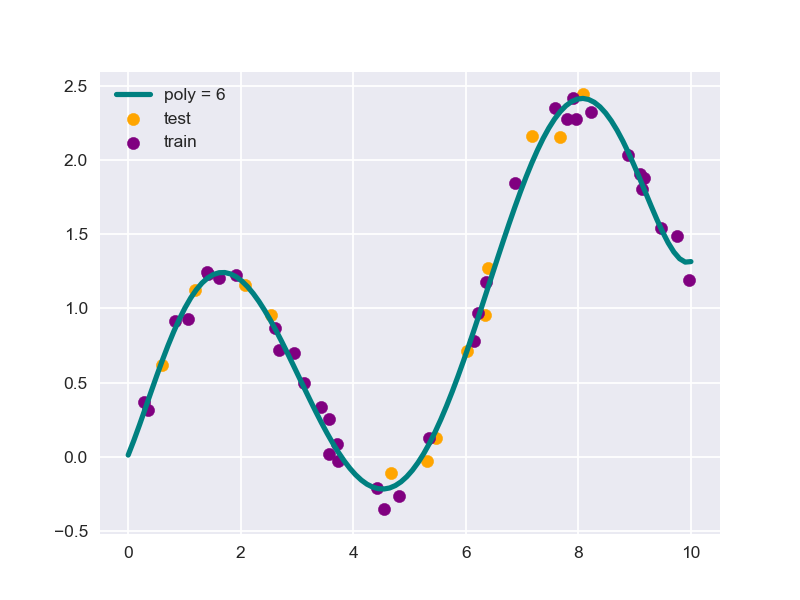

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Some generic data
np.random.seed(0); n = 50
x = np.linspace(0, 10, n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

poly_order = 6
grid_points = 100

X_train_pol = X_train.reshape(len(X_train),1)
X_test_pol = X_test.reshape(len(X_test),1)

polyfier = PolynomialFeatures(poly_order).fit(X_train_pol)
X_train_pol = polyfier.transform(X_train_pol)
X_test_pol = polyfier.transform(X_test_pol)

model = LinearRegression(fit_intercept = False) # intercept included in features
model.fit(X_train_pol, y_train)
y_pred = model.predict(X_test_pol)
y_pred_train = model.predict(X_train_pol)

print('R-squared for train data is {:0.2f}'.format(r2_score(y_train, y_pred_train)))
print('R-squared for test data is {:0.2f}'.format(r2_score(y_test, y_pred)))
p_vals, _ = p_values(model, X_train_pol, y_train)
print('p-values are:' )
np.set_printoptions(precision = 3)
print(p_vals)

lin_reg_plotter(model.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)


# Stuff to add

Validation curve: sklearn.model_selection.validation_curve<br>
Cross-validation: sklearn.model_selection.cross_val_score<br>
Pipelines<br>
Linear SVMs<br>
Kernelized SVMs<br>
Code to plot 2-dimensional decision regions in SVM<br>
Decisions trees and code to plot them, feature importance

Same kind of plot as in Course 3 Classifier visualization for probabilities. Works with binary target